In [22]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# 2. Load Dataset
df = pd.read_csv('/content/sample_data/hour.csv')

In [24]:
# 3. Cek Info Dasar (Untuk Bab 4.1)
print("Info Dataset:")
print(df.info())
print("\nUkuran Dataset:", df.shape)

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Ukuran Dataset: (17379, 17)


In [25]:
# 4. Cek Missing Values & Duplikat (Untuk Bab 4.3)
print("\nJumlah Missing Values:")
print(df.isnull().sum())
print("\nJumlah Duplikat:", df.duplicated().sum())


Jumlah Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Duplikat: 0


In [26]:
# --- VISUALISASI UNTUK BAB 4.4 ---

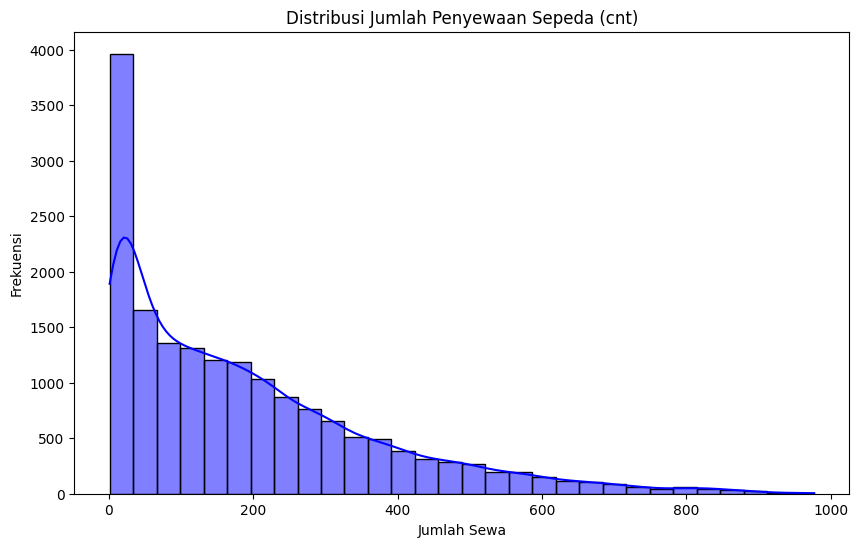

In [27]:
# Visualisasi 1: Distribusi Target (Jumlah Sewa)
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribusi Jumlah Penyewaan Sepeda (cnt)')
plt.xlabel('Jumlah Sewa')
plt.ylabel('Frekuensi')
plt.show() # Simpan gambar ini untuk Laporan Visualisasi 1

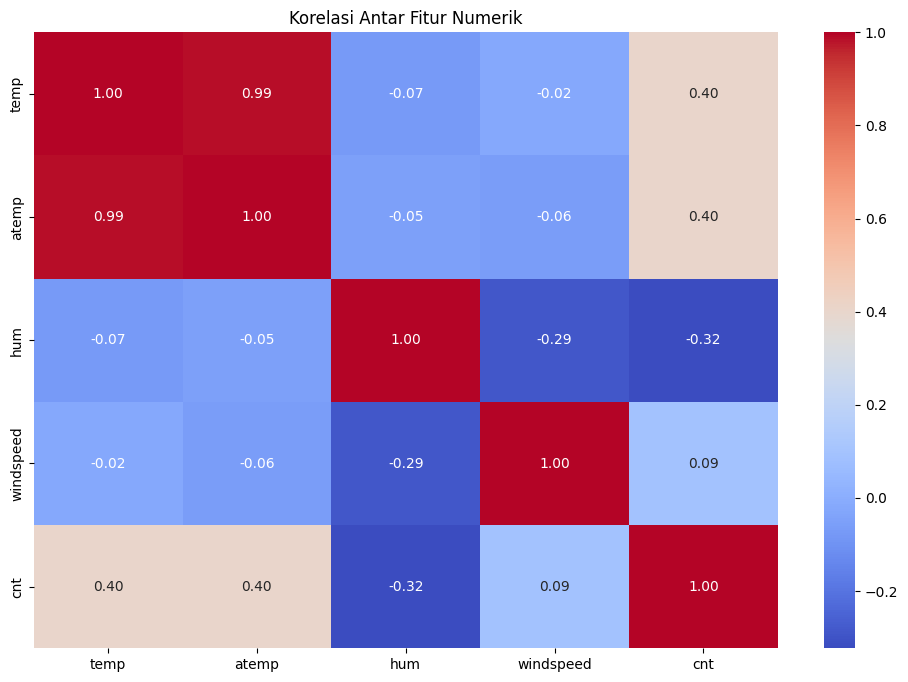

In [28]:
# Visualisasi 2: Korelasi Antar Fitur (Heatmap)
plt.figure(figsize=(12, 8))
# Kita ambil hanya kolom numerik untuk korelasi
correlation = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur Numerik')
plt.show() # Simpan gambar ini untuk Laporan Visualisasi 2

/tmp/ipython-input-420239817.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=df, estimator=np.mean, errorbar=None, palette='viridis')


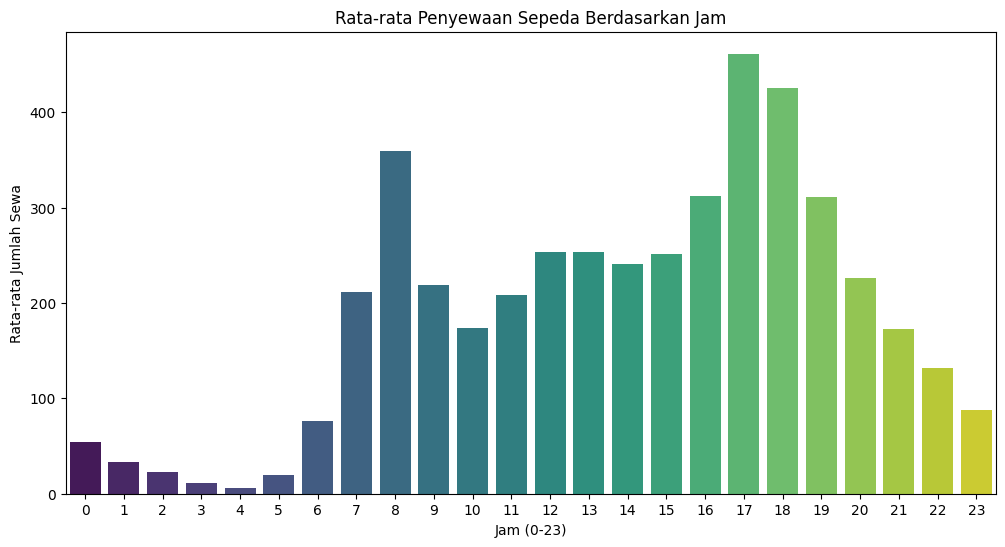

In [29]:
# Visualisasi 3: Rata-rata Sewa Berdasarkan Jam (Pola Harian)
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=df, estimator=np.mean, errorbar=None, palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam (0-23)')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.show() # Simpan gambar ini untuk Laporan Visualisasi 3

In [30]:
# --- KODE BAB 5: DATA PREPARATION ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
# 1. Feature Selection (Membuang fitur yang tidak perlu)
# - 'instant': hanya indeks
# - 'dteday': tanggal (sudah diwakili yr, mnth, hr)
drop_columns = ['instant', 'dteday', 'casual', 'registered']
df_clean = df.drop(columns=drop_columns)

print("Columns after dropping:", df_clean.columns)

Columns after dropping: Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


In [32]:
# 2. Memisahkan Fitur (X) dan Target (y)
X = df_clean.drop(columns=['cnt'])
y = df_clean['cnt']

In [33]:
# 3. Data Splitting (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")


Shape X_train: (13903, 12)
Shape X_test: (3476, 12)


In [34]:
# 4. Data Scaling (PENTING untuk Deep Learning/MLP)
# Kita standarisasi fitur numerik agar rentang nilainya sama
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']
scaler = StandardScaler()

# Fit pada training set, transform pada training & test set
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("\nContoh data hasil scaling (5 baris pertama):")
print(X_train[numerical_features].head())


Contoh data hasil scaling (5 baris pertama):
          temp     atemp       hum  windspeed
335  -1.540837 -1.620311 -0.399449   0.278669
7035  0.117112  0.138228 -1.073743  -0.697714
8051 -0.193753 -0.125843  1.934646   0.278669
2133 -0.193753 -0.125843 -1.644299  -1.552252
8485 -1.540837 -1.444457  0.637926  -0.697714


In [35]:
# --- BAB 6: MODELING ---
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
# --- MODEL 1: BASELINE (Linear Regression) ---
print("--- Training Model 1: Linear Regression ---")
start_time = time.time()

model_baseline = LinearRegression()
model_baseline.fit(X_train, y_train)
y_pred_baseline = model_baseline.predict(X_test)

time_baseline = time.time() - start_time
print(f"Selesai dalam {time_baseline:.4f} detik")
print(f"MAE Baseline: {mean_absolute_error(y_test, y_pred_baseline):.2f}\n")

--- Training Model 1: Linear Regression ---
Selesai dalam 0.0644 detik
MAE Baseline: 104.80



In [37]:
# --- MODEL 2: ADVANCED (Random Forest) ---
print("--- Training Model 2: Random Forest ---")
start_time = time.time()

# Hyperparameter sederhana
model_rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

time_rf = time.time() - start_time
print(f"Selesai dalam {time_rf:.4f} detik")
print(f"MAE Random Forest: {mean_absolute_error(y_test, y_pred_rf):.2f}\n")

--- Training Model 2: Random Forest ---
Selesai dalam 12.2491 detik
MAE Random Forest: 25.25



In [38]:
# --- MODEL 3: DEEP LEARNING (MLP) ---
print("--- Training Model 3: Deep Learning (MLP) ---")

# 1. Definisi Arsitektur (Sesuai Syarat: Min 2 Hidden Layer)
model_dl = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),     # Input Layer (12 fitur)
    layers.Dense(64, activation='relu'),         # Hidden Layer 1
    layers.Dropout(0.2),                         # Dropout (mencegah overfitting)
    layers.Dense(32, activation='relu'),         # Hidden Layer 2
    layers.Dense(16, activation='relu'),         # Hidden Layer 3
    layers.Dense(1)                              # Output Layer (1 neuron untuk Regresi)
])

# 2. Compile Model
model_dl.compile(
    optimizer='adam',
    loss='mse',            # Loss function untuk regresi (Mean Squared Error)
    metrics=['mae']        # Metrik pembanding
)

# 3. Training (Sesuai Syarat: Min 10 Epochs, ada validation split)
start_time = time.time()
history = model_dl.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% data train dipakai validasi
    epochs=50,             # Lebih dari syarat minimal 10
    batch_size=32,
    verbose=1
)
time_dl = time.time() - start_time

print(f"\nSelesai dalam {time_dl:.2f} detik")

--- Training Model 3: Deep Learning (MLP) ---
Epoch 1/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 46970.3867 - mae: 151.9588 - val_loss: 21449.7266 - val_mae: 106.0025
Epoch 2/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20255.7637 - mae: 101.8259 - val_loss: 18626.7656 - val_mae: 100.8739
Epoch 3/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18207.6465 - mae: 96.1274 - val_loss: 16632.2051 - val_mae: 93.0034
Epoch 4/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17092.5723 - mae: 92.9252 - val_loss: 15685.1826 - val_mae: 86.7581
Epoch 5/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15862.3867 - mae: 89.1902 - val_loss: 15422.3877 - val_mae: 83.3212
Epoch 6/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 15216.9863 - mae: 86.6451 - val_loss: 14423.0762 - val_mae: 82.1660
Epoch 7/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 14940.9580 - mae: 85.5805 - val_loss: 14311.1309 - val_mae: 86.4561
Epoch 8/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - 

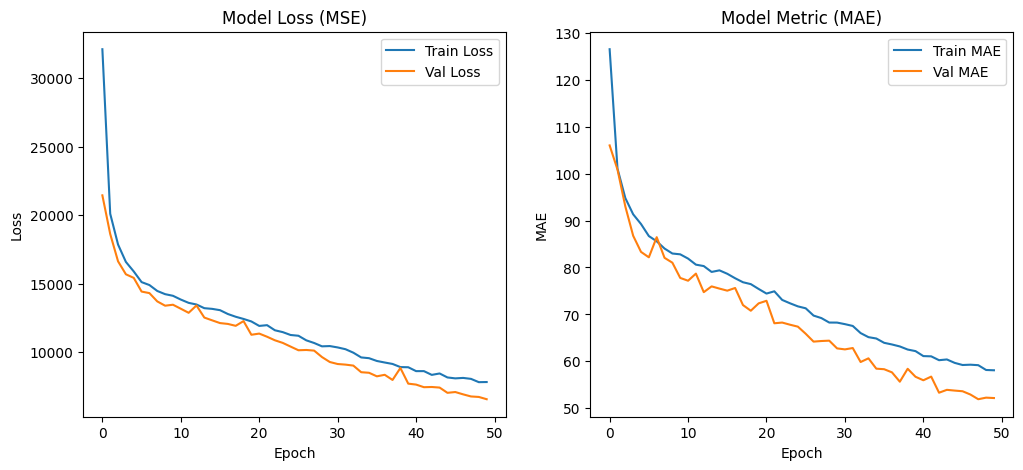

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,373 (40.52 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,916 (27.02 KB)

In [39]:
# 4. Visualisasi Training History (WAJIB ADA)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot Loss (MSE)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Metric (MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model Metric (MAE)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show() # Simpan gambar ini untuk Laporan Bab 6.3.6

# 5. Model Summary
model_dl.summary() # Copy output ini untuk Bab 6.3.7

In [40]:
# --- KODE BAB 7: EVALUATION & COMPARISON ---
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
# 1. Hitung Metrik Evaluasi (MAE & RMSE) untuk Ketiga Model
# Model 1: Baseline
mse_base = mean_squared_error(y_test, y_pred_baseline)
rmse_base = np.sqrt(mse_base)
mae_base = mean_absolute_error(y_test, y_pred_baseline)

# Model 2: Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Model 3: Deep Learning (Prediksi dulu)
y_pred_dl = model_dl.predict(X_test)
mse_dl = mean_squared_error(y_test, y_pred_dl)
rmse_dl = np.sqrt(mse_dl)
mae_dl = mean_absolute_error(y_test, y_pred_dl)

# Print Hasil untuk Di-Copy ke Tabel Laporan
print("\n=== HASIL EVALUASI (Salin angka ini ke Tabel 7.3) ===")
print(f"1. Baseline (LinReg)   -> MAE: {mae_base:.2f} | RMSE: {rmse_base:.2f}")
print(f"2. Advanced (RF)       -> MAE: {mae_rf:.2f}  | RMSE: {rmse_rf:.2f}")
print(f"3. Deep Learning (MLP) -> MAE: {mae_dl:.2f}  | RMSE: {rmse_dl:.2f}")
print("=====================================================\n")

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== HASIL EVALUASI (Salin angka ini ke Tabel 7.3) ===
1. Baseline (LinReg)   -> MAE: 104.80 | RMSE: 139.21
2. Advanced (RF)       -> MAE: 25.25  | RMSE: 42.57
3. Deep Learning (MLP) -> MAE: 51.26  | RMSE: 79.83



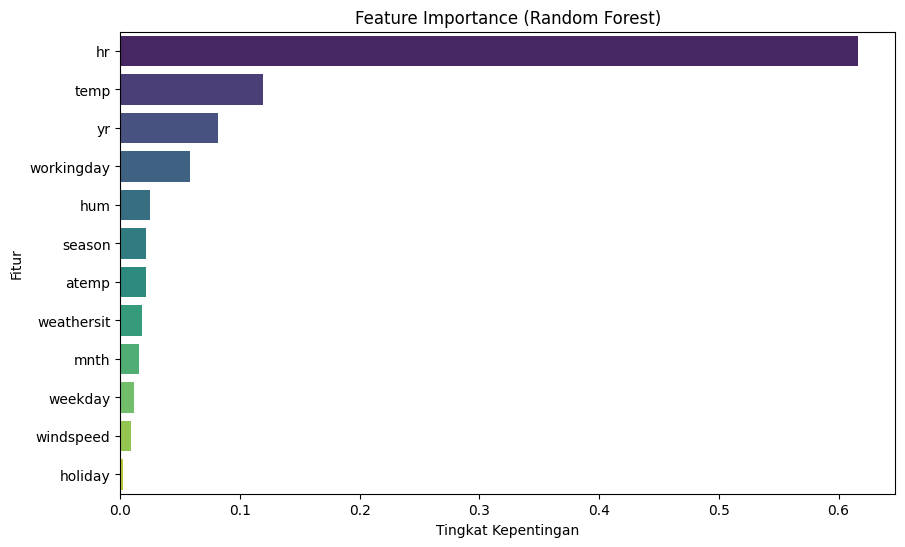

In [42]:
# 2. Visualisasi Feature Importance (Khusus Random Forest)
# Ini untuk Bab 7.2.2
plt.figure(figsize=(10, 6))
importances = model_rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis", hue=feature_names[indices], legend=False)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Fitur")
plt.show() # SIMPAN GAMBAR INI UNTUK BAB 7.2.2

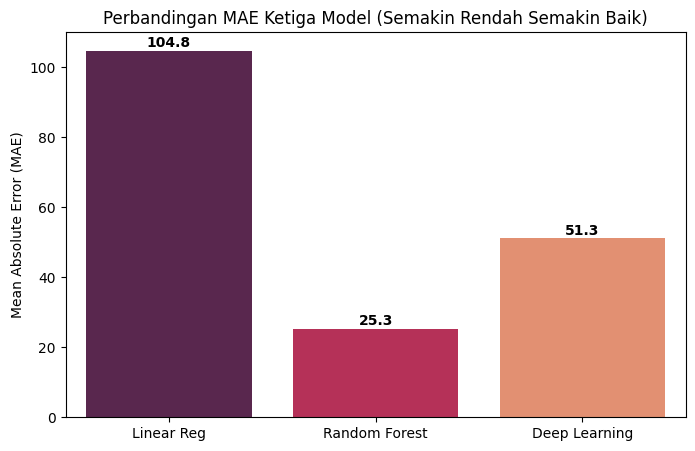

In [43]:
# 3. Visualisasi Perbandingan Model
# Ini untuk Bab 7.3
models = ['Linear Reg', 'Random Forest', 'Deep Learning']
maes = [mae_base, mae_rf, mae_dl]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=maes, palette="rocket", hue=models, legend=False)
plt.title("Perbandingan MAE Ketiga Model (Semakin Rendah Semakin Baik)")
plt.ylabel("Mean Absolute Error (MAE)")
for i, v in enumerate(maes):
    plt.text(i, v + 1, f"{v:.1f}", ha='center', fontweight='bold')
plt.show() # SIMPAN GAMBAR INI UNTUK BAB 7.3